In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
dataDir='/media/greghovhannisyan/BackupData1/mscoco/'
dataType='train2017'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

In [6]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=14.14s)
creating index...
index created!


In [8]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

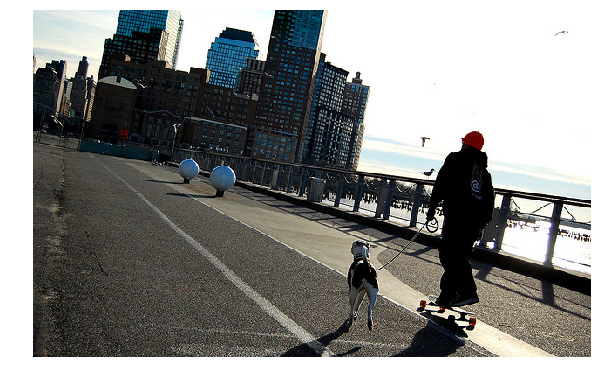

In [10]:
I = io.imread(dataDir + 'images/' + 'train2017/' + '000000' + str(img['id']) + '.jpg')
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

[[377.3, 321.37, 371.05, 338.25, 369.8, 355.75, 373.55, 352.0, 376.05, 336.37, 382.31, 325.74, 387.93, 335.75, 383.56, 345.75, 384.18, 363.26, 388.56, 370.76, 391.06, 361.38, 391.06, 343.25, 396.06, 330.12, 394.81, 313.24, 392.93, 298.23, 384.81, 285.11, 388.56, 271.98, 381.06, 265.72, 376.05, 265.1, 366.05, 266.35, 365.43, 275.73, 368.55, 286.36, 363.55, 299.49, 359.8, 309.49, 364.8, 323.24, 363.55, 334.5, 365.43, 352.63, 361.67, 357.63, 366.68, 355.75, 369.8, 335.75, 371.68, 326.37, 376.05, 323.24]]


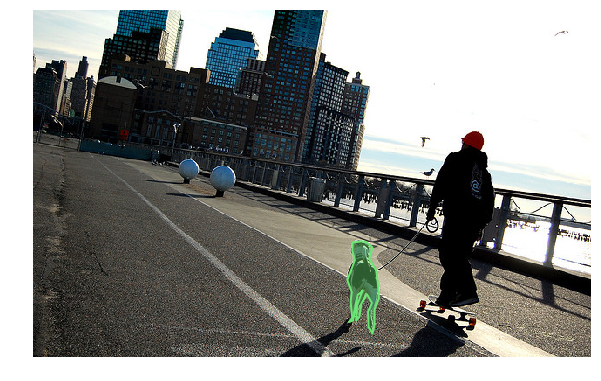

In [41]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
#[print(val) for val in item for item in anns]
# print(len(anns))
# for item in anns:
#     print(item['category_id'], item['bbox'], item['segmentation'])

#print(type(anns))

#print(anns)

#print(anns[0])    
#print(list(anns[0])[0])
    
# print(len(anns))    
# for item in anns:
#     for val in item:
#         print(val)


# BINGO
temp_list = list()
temp_list.append(anns[0])
print(temp_list[0]['segmentation'])
coco.showAnns(temp_list)

In [57]:
#print(temp_list[0]['image_id'])
mask_as_arr = coco.annToMask(temp_list[0])
np.sum(coco.annToMask(temp_list[0]))

2142

In [56]:
from PIL import Image

img = Image.fromarray(coco.annToMask(temp_list[0]), '1')
img.save('my.jpg')
img.show()

In [63]:
num_set = set()
for ix,iy in np.ndindex(mask_as_arr.shape):
    if(mask_as_arr[ix,iy] != 0):    
        mask_as_arr[ix,iy] = 255
        #num_set.add(mask_as_arr[ix,iy])
        #print(mask_as_arr[ix,iy])

In [65]:
img = Image.fromarray(mask_as_arr, 'L')
#img.save('my.jpg')
img.show()